In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Botão para upload do arquivo
print("Por favor, faça o upload do arquivo spam.csv")
uploaded = files.upload()

# Carregar o arquivo em um DataFrame
spam = pd.read_csv("spam.csv", encoding="latin-1")
spam = spam.rename(columns={"v1": "Category", "v2": "Message"})  # Renomear colunas
spam = spam[["Category", "Message"]]  # Manter apenas colunas relevantes
print("Primeiras linhas do dataset:")
print(spam.head())


Por favor, faça o upload do arquivo spam.csv


Saving spam.csv to spam.csv
Primeiras linhas do dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


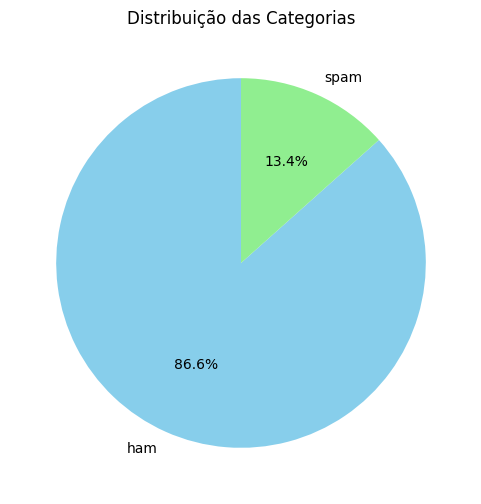

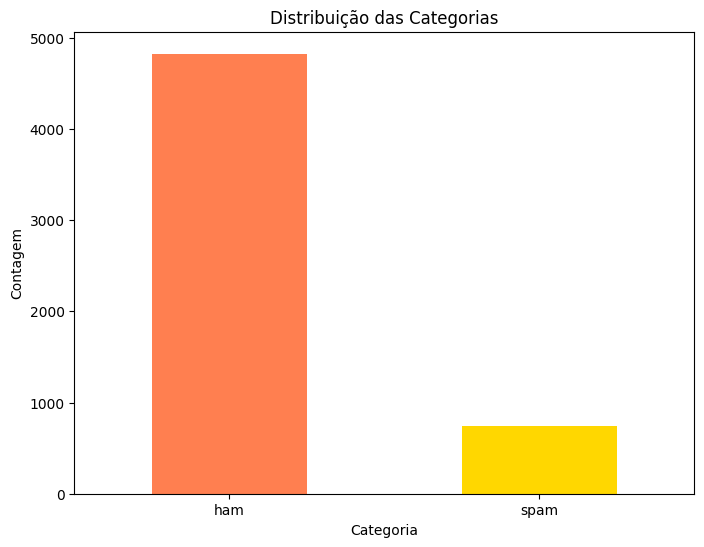

In [ ]:
# Gráfico de pizza para distribuição de categorias
category_counts = spam['Category'].value_counts()
plt.figure(figsize=(6, 6))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=category_counts.index, colors=['skyblue', 'lightgreen'])
plt.title("Distribuição das Categorias")
plt.ylabel('')
plt.show()

# Gráfico de barras para distribuição de categorias
plt.figure(figsize=(8, 6))
#kind pode ainda assumir valores como line, barh, bar,  area, hist, box
category_counts.plot(kind='bar', color=['coral', 'gold'])
plt.title("Distribuição das Categorias")
plt.xlabel("Categoria")
plt.ylabel("Contagem")
plt.xticks(rotation=0)
plt.show()


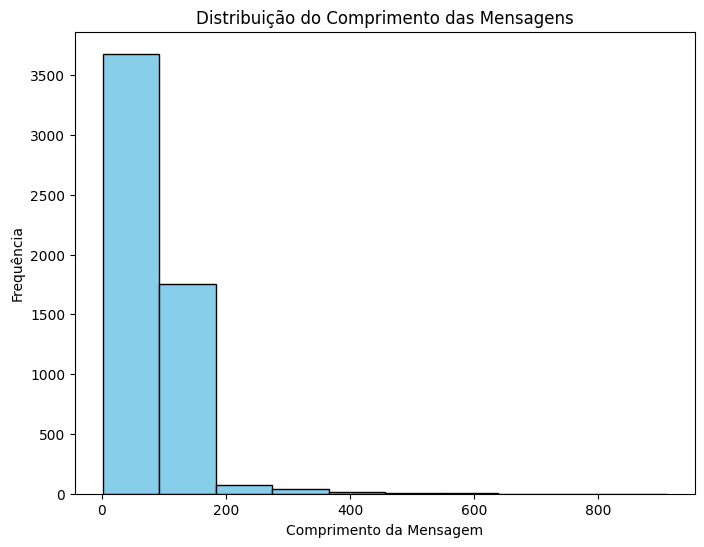

<Figure size 800x600 with 0 Axes>

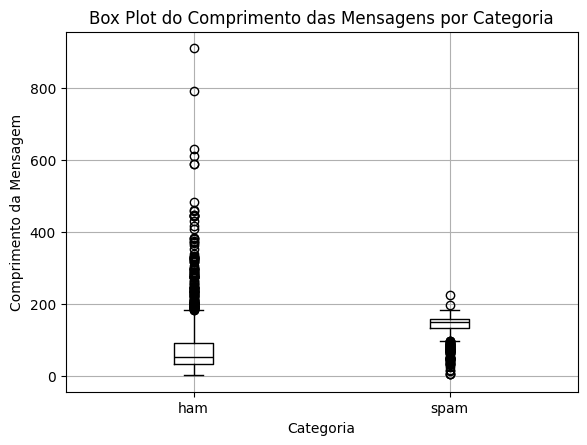

In [ ]:
# Adicionando uma coluna para o comprimento das mensagens
spam['Message Length'] = spam['Message'].apply(len)

# Histograma do comprimento das mensagens
plt.figure(figsize=(8, 6))
#divide os dados em 30 faixas (intervalos)
plt.hist(spam['Message Length'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribuição do Comprimento das Mensagens")
plt.xlabel("Comprimento da Mensagem")
plt.ylabel("Frequência")
plt.show()

# Box plot do comprimento das mensagens por categoria
plt.figure(figsize=(8, 6))
spam.boxplot(column='Message Length', by='Category', grid=True, color='black')
plt.title("Box Plot do Comprimento das Mensagens por Categoria")
plt.suptitle('')
plt.xlabel("Categoria")
plt.ylabel("Comprimento da Mensagem")
plt.show()


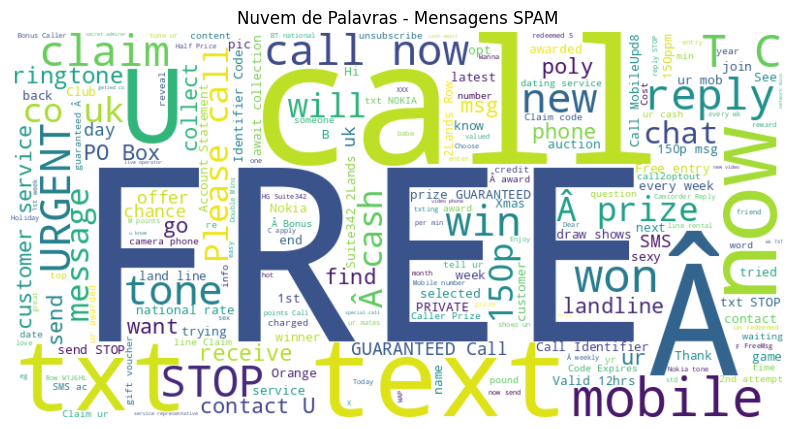

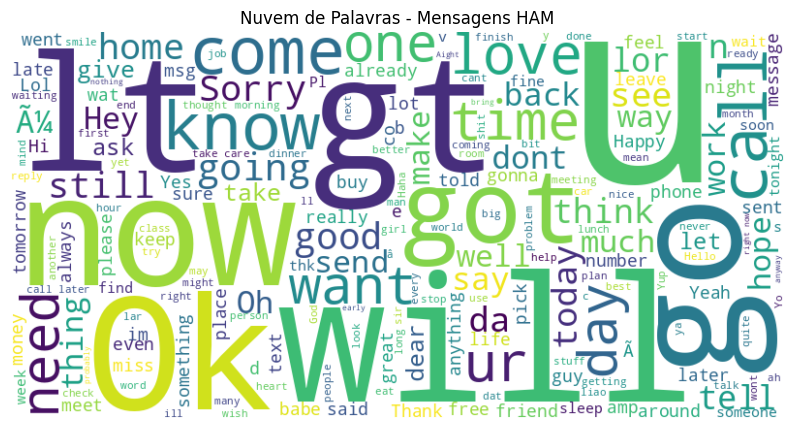

In [ ]:
from wordcloud import WordCloud

# Nuvem de palavras para mensagens de SPAM
spam_messages = " ".join(spam[spam['Category'] == 'spam']['Message'])
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("Nuvem de Palavras - Mensagens SPAM")
plt.axis('off')
plt.show()

# Nuvem de palavras para mensagens HAM
ham_messages = " ".join(spam[spam['Category'] == 'ham']['Message'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title("Nuvem de Palavras - Mensagens HAM")
plt.axis('off')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


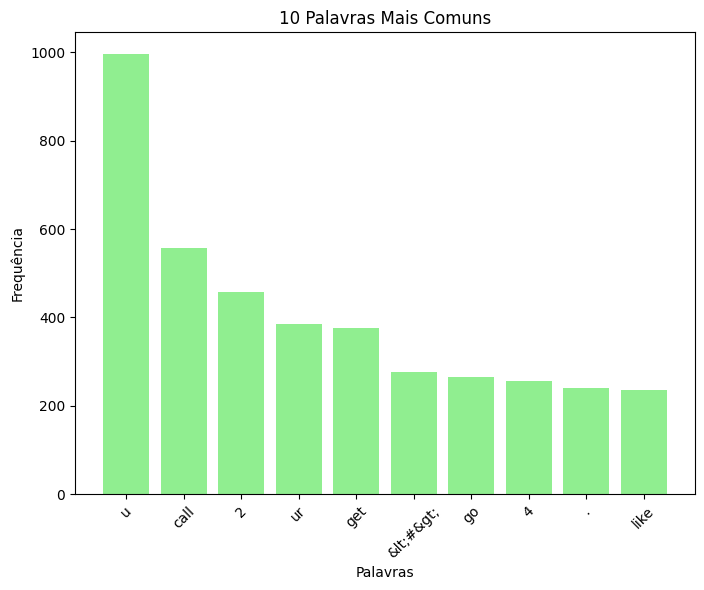

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Contar palavras
all_words = " ".join(spam['Message']).lower().split()
#all_words = " ".join(spam[spam['Category'] == 'spam']['Message']).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)

# Selecionar as 10 palavras mais comuns
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(words, counts, color='lightgreen')
plt.title("10 Palavras Mais Comuns")
plt.xlabel("Palavras")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()
